# Neural & Behavioral Modeling - Week 2 (Exercises)
by Cheng-Kuang Wu (r10922186@ntu.edu.tw)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import *

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-7j9meqwx because the default path (/home/ckwu/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## 1 Nonlinear love triangle (5 points)

Please use Euler integration with a small step size (say dt=0.01) and the suggested parameters (a,b,c,d,e,f)=(-3,4,-7,2,2,-1) to simulate Eq.(5) in the following paper:

Sprott, J. C. (2004). Dynamical models of love. Nonlinear dynamics, psychology, and life sciences, 8(3), 303-314.

### 1.1  Coding the simulation (3 points)

Please use differnt colors/shapes to put Rj(t), J, Rg(t), & G(t) curves in the same plot.

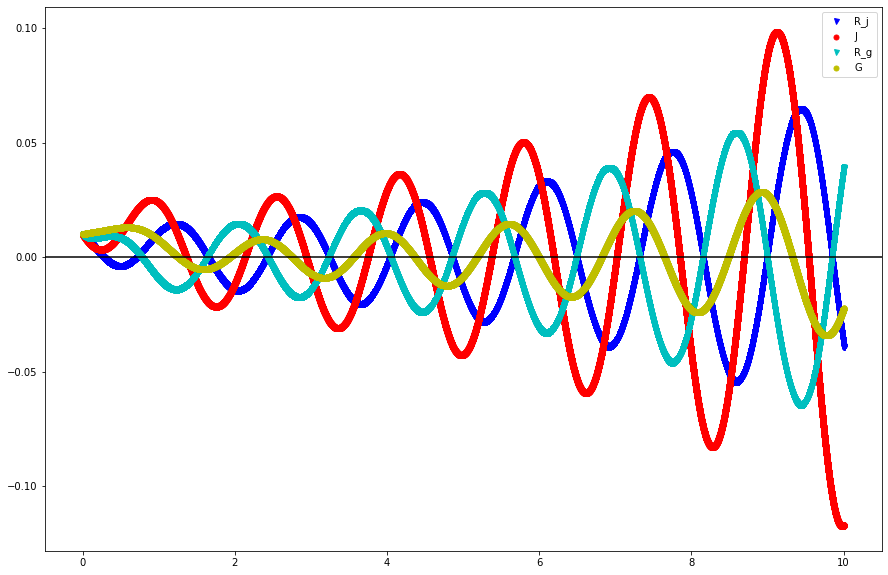

In [2]:
# Model class for simulating the love triangle between Romeo, Juliet, and Guinevere
class LoveTriangle(object):
    # Model initialization
    def __init__(self):
        # suggested model parameters
        self.params = (-3, 4, -7, 2, 2, -1)

    # Provide initial values of (R_j, J, R_g, G) and run the simulation
    def simulate(self, R_j: float, J: float, R_g: float, G: float, dt: float = 0.01, t_max: float = 10.0):
        # Model parameters
        a, b, c, d, e, f = self.params
        # Initial values of (Rj, J, Rg, G)
        R_j, J, R_g, G = [R_j], [J], [R_g], [G]
        # Plotting parameters
        t_range = np.arange(0, t_max, dt)

        # Euler integration
        for _ in t_range:
            # get initial values
            r_j1 = R_j[-1]
            j1   = J[-1]
            r_g1 = R_g[-1]
            g1   = G[-1]

            # calculate subsequent values
            r_j2 = r_j1 + dt * (a * r_j1 + b * (j1 - g1) * (1 - abs(j1 - g1)))
            j2   = j1   + dt * (c * r_j1 * (1 - abs(r_j1)) + d * j1)
            r_g2 = r_g1 + dt * (a * r_g1 + b * (g1 - j1) * (1 - abs(g1 - j1)))
            g2   = g1   + dt * (e * r_g1 * (1 - abs(r_g1)) + f * g1)

            # append subsequent values
            R_j.append(r_j2)
            J.append(j2)
            R_g.append(r_g2)
            G.append(g2)

        plt.figure(figsize=(15, 10))

        plt.plot(t_range, R_j[:-1], "bv", markersize=5) # blue: Romeo's love for Juliet
        plt.plot(t_range, J[:-1], "ro", markersize=5)   # red: Juliet's love for Romeo
        plt.plot(t_range, R_g[:-1], "cv", markersize=5) # cyan: Romeo's love for Guinevere
        plt.plot(t_range, G[:-1], "yo", markersize=5)   # yellow: Guinevere's love for Romeo

        plt.axhline(y=0.0, color="k") # plot a horizontal line as reference
        plt.legend(["R_j", "J", "R_g", "G"])

love_triangle = LoveTriangle()
love_triangle.simulate(R_j=0.01, J=0.01, R_g=0.01, G=0.01, dt=0.0001) # Run the simulation where everyone loves everyone at first

If everyone loves everyone at first, then there will be oscillation of their affection towards each other. The oscillation will become larger and larger as time goes by.

### 1.2 Studying chaos (2 points)

Please provide two sets of initial values of (Rj, J, Rg, & G) that can produce distinct model behaviors.

#### 1.2.1 Romeo loves Juliet but hates Guinevere at first: (Rj, J, Rg, G) = (0.5, 0, -0.5, 0)

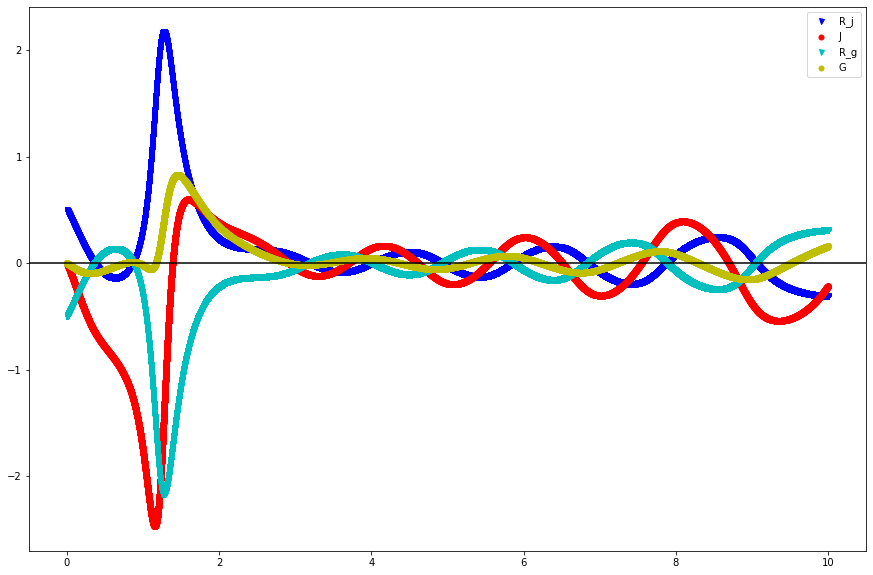

In [4]:
love_triangle.simulate(R_j=0.5, J=0, R_g=-0.5, G=0, dt=0.0001, t_max=10)

1. Romeo's love

In the figure above, there are opposite trends for R_j and R_g at first since there are self-balacing terms $aR_J$ and $aR_G$ (a < 0) in $\frac{dR_J}{dt}$ and $\frac{dR_G}{dt}$, respectively. As for the points where R_j and R_g intersect at around y = 0, the main terms in $\frac{dR_J}{dt}$ and $\frac{dR_G}{dt}$ become $b(J - G)(1 - |J - G|)$ and $b(G - J)(1 - |G - J|)$ (b > 0), respectively. Because the signs of these two terms are opposite when $J \neq G$, these terms also contribute to the opposite trends of R_j and R_g in the figure above.

2. Juliet's love

Juliet's love for Romeo has a self-reinforcing term $dJ$ (d > 0), so her love or hate will strengthen itself. However, there is the other term $cR_J(1 - |R_J|)$ (c < 0), which is negative when $0 < R_J < 1$ and positive when $(-1 < R_J < 0) \lor (R_J > 1)$ in the figure above. Therefore, Juliet's hate for Romeo will be cancelled out by Romeo's "small hate" or "huge love" by a delayed time interval, and Juliet's love for Romeo will be cancelled out by Romeo's "small love" by a delayed time interval. Both findings are compatible with the above plot.

3. Guinevere's love

Guinevere's love for Romeo has a self-balancing term $fG$ (f < 0), so her love or hate will diminish itself. This effect can be observed by the fact that the oscillation amplitude is smaller for G than for J, whose love is self-reinforcing. The other term is $eR_G(1 - |R_G|)$ (e > 0), which is negative when $-1 < R_G < 0$ and positive when $(R_G < -1) \lor (0 < R_G < 1)$ in the figure above. Therefore, Guinevere's love for Romeo will be strengthened by Romeo's "huge hate" or "small love" and diminished by his "small hate", both of which are realized by a delayed time interval as shown in the above plot.

#### 1.2.2 Romeo loves Juliet and Guinevere both at first (Rj, J, Rg, G) = (0.5, 0, 0.5, 0)

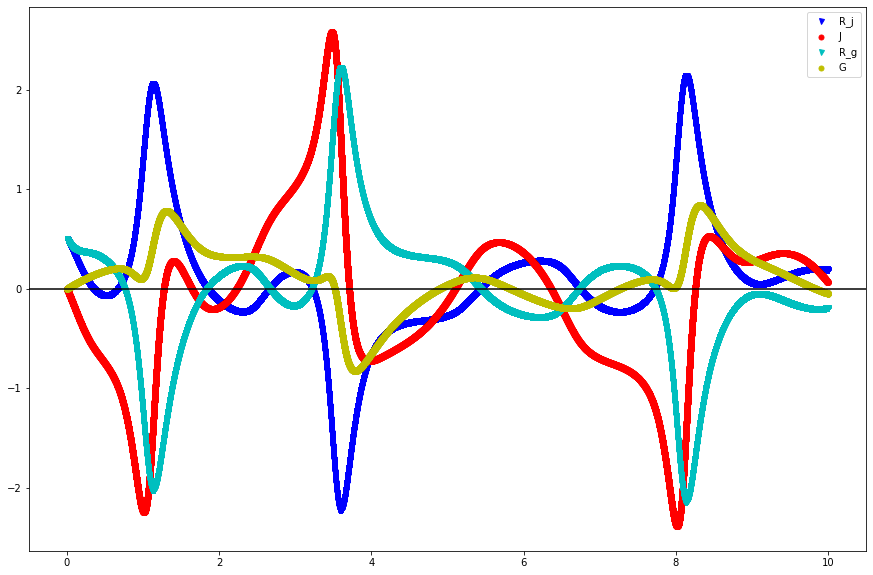

In [5]:
love_triangle.simulate(R_j=0.5, J=0, R_g=0.5, G=0, dt=0.0001, t_max=10)

The love mechanism in this love triangle is elaborate in the above subsection 1.2.1. The difference in this example is the initial state, where Romeo loves both Juliet and Guinevere. Because of the self-balancing terms $aR_J$ and $aR_G$ (a < 0), R_j and R_g both decreases at first. However, since Romeo's initial love for Juliet leads to Juliet's hate and Romeo's initial love for Guinevere leads to Guinevere's initial love, the term $-1< J - G < 0$ makes Romeo's love for Juliet (R_j) decrease faster.

Some Romeo's values which didn't appear in subsection 1.2.1 are $R_J < -1$ and $R_G > 1$, so we will discuss these two cases in this subsection. When $R_J < -1$, the term $cR_J(1 - |R_J|)$ (c < 0) is negative, which results in the steep negative slope of Juliet's love (J) for Romeo in the above figure; as for $R_G > 1$, the term $eR_G(1 - |R_G|)$ (e > 0) is also negative, so it results in steep negative slope of Guinevere's hate for Romeo in the figure as well.

## 2 Fix the simulation of "Growth and underinvestment" (5 points)

Although the simulation and explanation of "underinvested growth" seem reasonable, the simulation doesn't appear to describe "sufficiently invested growth" where the performance varialbe should be able to increase over time. Please do whatever you can to have a model that can simulate both phenomena. 

## Original Implementation

37.01369654264772


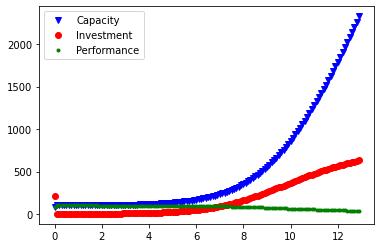

In [6]:
performance_standard=100 # Model parameter
Capacity,Demand=[80],[1] # Initial values
dt=.1 # step size for numerical integration
t=np.arange(0,13,dt) # integration period
perf,inves=[],[]
for i in t:
    Capacity1,Demand1=Capacity[-1],Demand[-1] # the last element
    performance=Capacity1-Demand1 # net gains
    perf.append(performance)
    growing_action=0.01*Demand1 # more demands -> grow the company
    investment=10*(performance_standard-performance) # put in money if performance not reaching the standard
    inves.append(investment)
    Capacity2=Capacity1+dt*investment # Euler integration: put in money to increase capacity
    Demand2=Demand1+dt*0.75*growing_action*performance # Euler integration to reach equilibrium: capacity=demand
    Capacity.append(Capacity2)
    Demand.append(Demand2)
plt.plot(t,Capacity[0:-1],'bv')
plt.plot(t,inves,'ro')
plt.plot(t,perf,'g.')
plt.legend(['Capacity','Investment','Performance'])
print(perf[-1]) # The final performance

## My Implementation

From my point of view, part of the problem lies in that the "demand" grows in proportion to the "performance" but the static "performance_standard" parameter sets an upper limit to possible "investment", such that the "investment" and the subsequent "capacity" cannot grows faster than "demand". This makes continuous "performance" increment impossible. Therefore, I remove the "performance_standard" parameter and add a "invest_ratio" parameter to my model, which is represented by the class below (see the inline comments for more details).

In [18]:
class MyGrowthModel(object):
    # Model initialization
    def __init__(self, capacity_init: float, demand_init: float):
        # initial capacity and demand
        self.capacity_init = capacity_init
        self.demand_init = demand_init

    # Simulate the capacity, demand, investment, and performance curves by different investment ratio (invest_ratio)
    def simulate(self, invest_ratio: float) -> None:
        Capacity, Demand = [self.capacity_init], [self.demand_init] # Initial values
        dt = .01 # step size for numerical integration
        t = np.arange(0, 10, dt) # integration period
        perf, inves = [] , []
        for i in t:
            Capacity1, Demand1 = Capacity[-1], Demand[-1] # the last element
            performance = Capacity1 - Demand1 # net gains
            perf.append(performance)

            growing_action = 0.5 * Demand1 # more demands -> grow the company
            # NOTE: the total investment is proportion to (invest_ratio * growing_action), that is, invest more if there is larger growing action for the company and larger investment ratio (which is arbitrarily decided)
            investment = invest_ratio * growing_action
            inves.append(investment)

            Capacity2 = Capacity1 + dt * investment # Euler integration: put in money to increase capacity
            Demand2 = Demand1 + dt * growing_action # Euler integration: the demand grows as the company grows
            Capacity.append(Capacity2)
            Demand.append(Demand2)
            
        plt.plot(t,Capacity[0:-1],'bv')
        plt.plot(t,Demand[0:-1],'cv')
        plt.plot(t,inves,'ro')
        plt.plot(t,perf,'g.')
        plt.legend(['Capacity', 'Demand','Investment','Performance'])
        print(f"Initial performance: {perf[0]} / Final performance: {perf[-1]}") # The final performance

growth_model = MyGrowthModel(capacity_init=80.0, demand_init=1.0)

### 2.1 Underinvested Growth

Initial performance: 79.0 / Final performance: 42.788401589276646


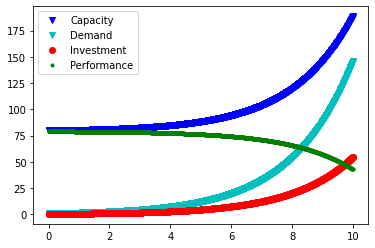

In [19]:
growth_model.simulate(invest_ratio=0.75)

If one decides to invest **less** (e.g., invest_ratio = 0.75) than the growing action, the capacity will grows **slower** than the demand, which will lead to continuous **performance decrease** in the future.

### 2.2 Sufficiently Invested Growth

Initial performance: 79.0 / Final performance: 151.4231968214466


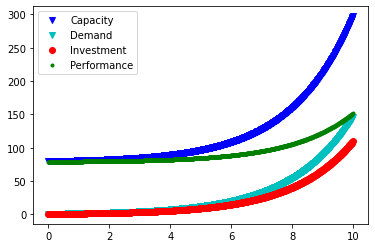

In [20]:
growth_model.simulate(invest_ratio=1.50)

If one decides to invest **more** (e.g., invest_ratio = 1.50) than the growing action, the capacity will grows **faster** than the demand, which will lead to continuous **performance increase** in the future.

### 2.3 BONUS: Borderline Invested Growth

Initial performance: 79.0 / Final performance: 78.99999999999986


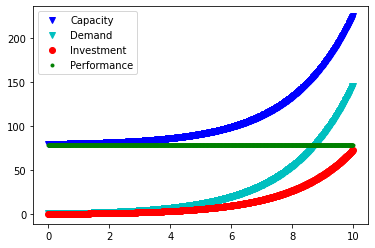

In [22]:
growth_model.simulate(invest_ratio=1.00)

If one decides to invest **the same** (e.g., invest_ratio = 1.00) as the growing action, the capacity will grows **as fast** as the demand, which will lead to **static performance** in the future.